# Football Analysis

##  Introduction

Football, being one of the most beloved and globally celebrated sports, is not just a game of passion but also a domain rich with data that encapsulates the performance and potential of individual players. This dataset presents a comprehensive collection of information about football players, encompassing diverse attributes such as age, nationality, overall and potential ratings, club affiliations, market value, and wages. In this context, leveraging data analysis and modeling techniques becomes imperative for extracting meaningful insights that can inform decisions related to player recruitment, contract negotiations, and team strategy.

## Objectives

### Main Objective

To predict future player performance based on the current players relevant attributes

### Other Objectives 

- Club Comparison 
- Rating players based on current attributes
- Goal Keepers Analysis
- To draw meaningful insights from the dataset


In [1]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score #Evaluate model performance

import statsmodels.api as sm 
import warnings

warnings.filterwarnings("ignore")

### Loading the Dataset

In [2]:
# Loading and Previewing the data 
df = pd.read_csv("fifa.csv")
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

### Data cleaning

In [6]:
# dropping irrelevant columns
columns_to_drop = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB','RCB', 'RB','Joined','Contract Valid Until','Release Clause','Jersey Number']

df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [7]:
#Checking for missing values
# Creating function to check missing values and duplicates
def check_values(data):
    missing_values = data.isnull().sum().T
    return missing_values

check_values(df)

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Special                       0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Real Face                    48
Position                     60
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSp

In [8]:
# Dropping rows with values 
min_values = 48
df.dropna(thresh=min_values,inplace=True)

In [55]:
# Hadling missing values
def handling_missing_values(data):
    mode_club = data['Club'].mode()[0]  # Calculate mode and access the first value
    mode_position = data['Position'].mode()[0]  # Calculate mode and access the first value
    data['Club'] = data['Club'].fillna(mode_club)
    data['Position'] = data['Position'].fillna(mode_position)
    return data

df = handling_missing_values(df)
print(df.isnull().sum())


ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

In [13]:
# Checking missing values 
check_values(df)

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

## Exploratory Data Analysis

In [54]:
# Categorical Columns
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,Name,Nationality,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Height,Weight
0,L. Messi,Argentina,FC Barcelona,€110.5M,€565K,Left,Medium/ Medium,Messi,Yes,RF,5'7,159lbs
1,Cristiano Ronaldo,Portugal,Juventus,€77M,€405K,Right,High/ Low,C. Ronaldo,Yes,ST,6'2,183lbs
2,Neymar Jr,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,High/ Medium,Neymar,Yes,LW,5'9,150lbs
3,De Gea,Spain,Manchester United,€72M,€260K,Right,Medium/ Medium,Lean,Yes,GK,6'4,168lbs
4,K. De Bruyne,Belgium,Manchester City,€102M,€355K,Right,High/ High,Normal,Yes,RCM,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,England,Crewe Alexandra,€60K,€1K,Right,Medium/ Medium,Lean,No,CM,5'9,134lbs
18203,N. Christoffersson,Sweden,Trelleborgs FF,€60K,€1K,Right,Medium/ Medium,Normal,No,ST,6'3,170lbs
18204,B. Worman,England,Cambridge United,€60K,€1K,Right,Medium/ Medium,Normal,No,ST,5'8,148lbs
18205,D. Walker-Rice,England,Tranmere Rovers,€60K,€1K,Right,Medium/ Medium,Lean,No,RW,5'10,154lbs


In [15]:
# Numerical columns
numerical_columns = df.select_dtypes(include=['int64','float64'])
numerical_columns

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,1307,1.0,2.0,2.0,34.0,38.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,243165,19,47,63,1098,1.0,2.0,2.0,23.0,52.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,241638,16,47,67,1189,1.0,3.0,2.0,25.0,40.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,246268,17,47,66,1228,1.0,3.0,2.0,44.0,50.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


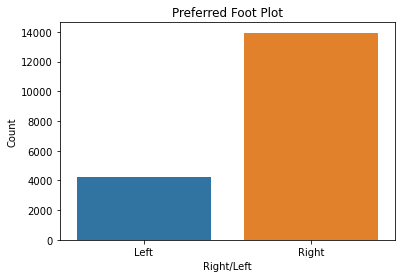

<Figure size 504x360 with 0 Axes>

In [16]:
# The distribution of preferred foot
sns.countplot(data=df, x="Preferred Foot")
plt.title("Preferred Foot Plot")
plt.xlabel("Right/Left")
plt.ylabel("Count")
plt.figure(figsize=(7,5))
plt.show()


In [56]:
# Mean age of players
mean_age = pd.DataFrame(df.groupby(['Age'])['Overall'].mean()) 

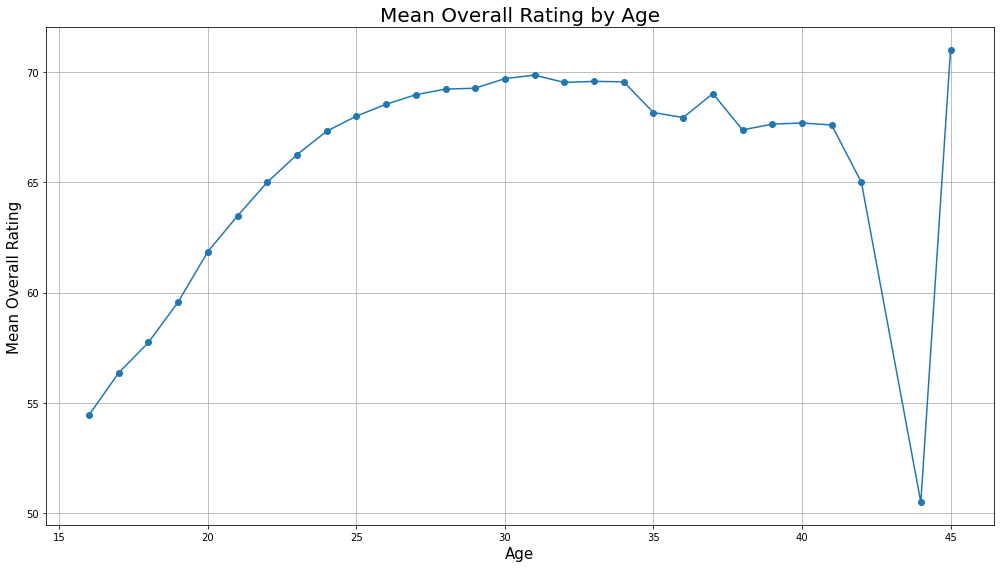

In [18]:
# Mean Overall Rating by Age
mean_age = df.groupby('Age')['Overall'].mean().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(mean_age['Age'], mean_age['Overall'], marker='o', linestyle='-')
plt.title('Mean Overall Rating by Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Mean Overall Rating', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()


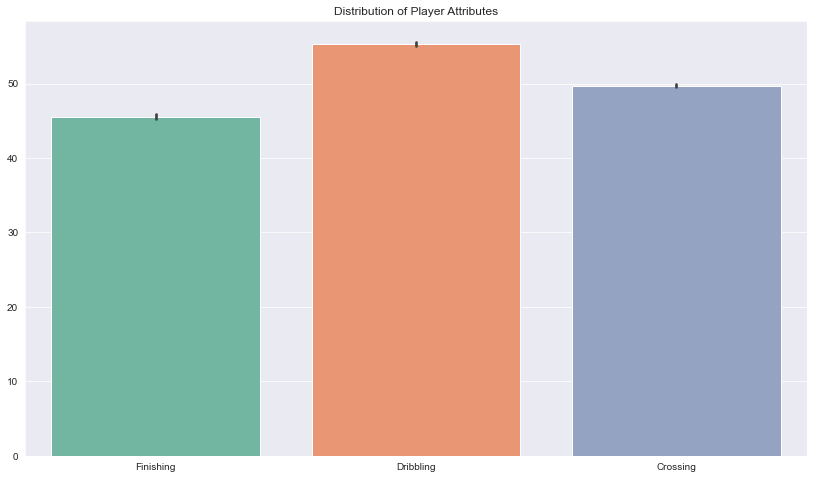

In [53]:
# Distribution of Player Attributes
attributes_to_analyze = ['Finishing', 'Dribbling', 'Crossing']

plt.figure(figsize=(14, 8))
sns.barplot(data=df[attributes_to_analyze], palette='Set2')
sns.set_style("whitegrid")
plt.title('Distribution of Player Attributes')
plt.show()

In [52]:
numerical = [ cat for cat in df.columns if df[cat].dtypes !='O']
print('List of numerical variables {}'.format(numerical))

List of numerical variables ['ID', 'Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [21]:
# Numerical Features
numerical_data = ['Age','Overall','Potential','International Reputation','Weak Foot','Skill Moves','Crossing','Finishing',
 'HeadingAccuracy','Volleys','Dribbling','BallControl','Acceleration','SprintSpeed','ShotPower','Strength','Vision']


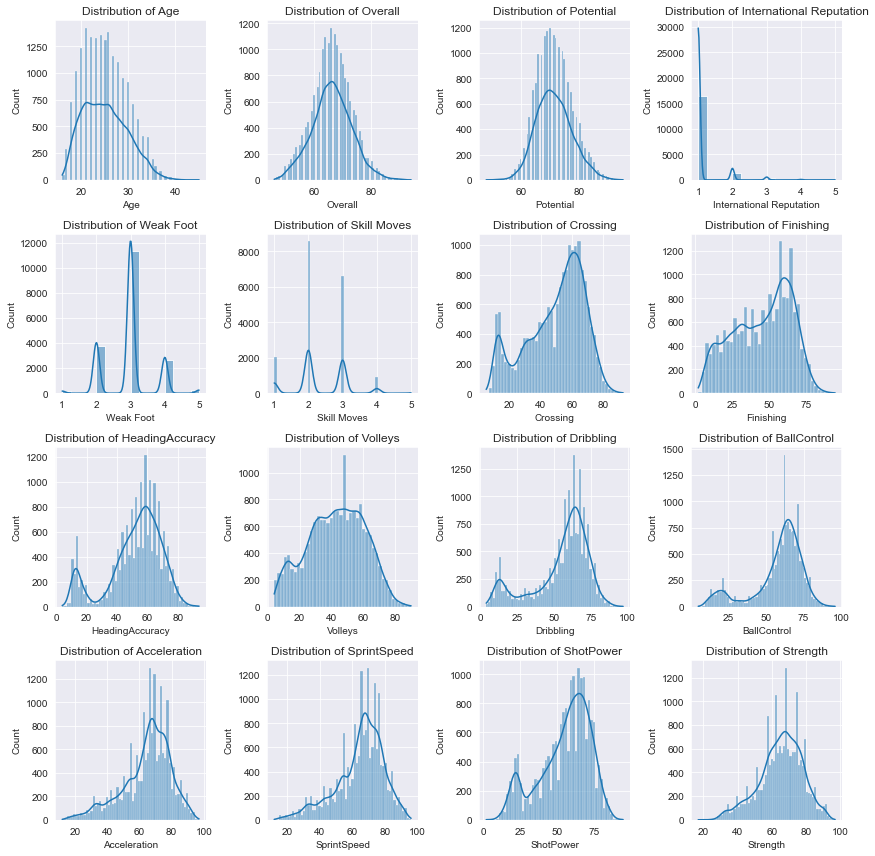

In [51]:
# Assuming numerical_data contains the list of column names
numerical_data = ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'Volleys', 'Dribbling', 'BallControl', 'Acceleration', 'SprintSpeed', 'ShotPower', 'Strength']

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, column in enumerate(numerical_data[:16]):  # Ensure it loops for available axes
    row = i // 4  # Calculate the row index
    col = i % 4   # Calculate the column index
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

  # Hide any unused subplots
for i in range(len(numerical_data), 16):
    row = i // 4
    col = i % 4
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

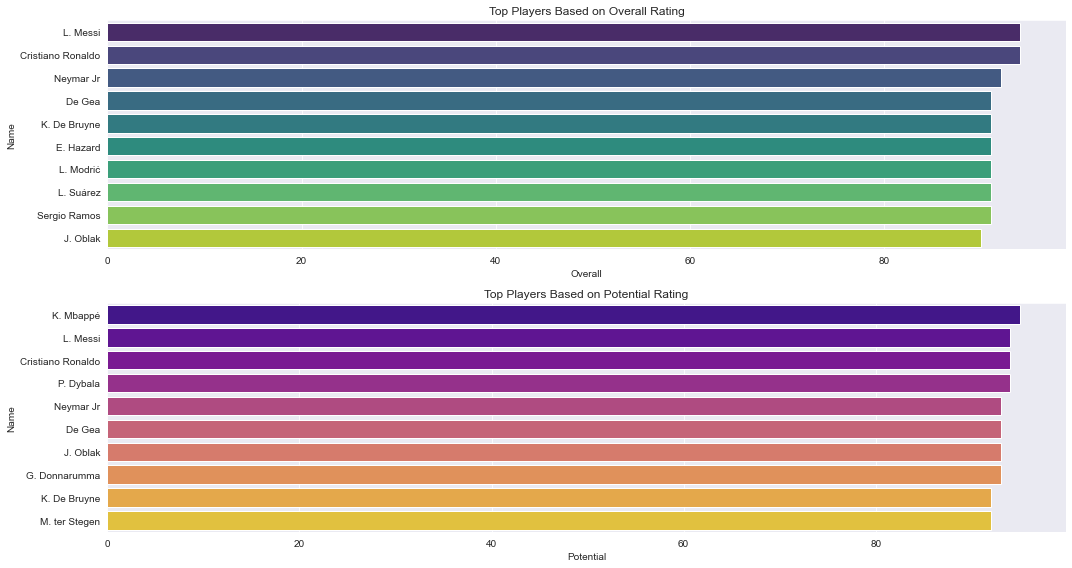

In [47]:
# Top Players/ Potential Rating
top_players_overall = df.nlargest(10, 'Overall')  # Adjust the number of top players as needed
top_players_potential = df.nlargest(10, 'Potential')

# Plot Overall and Potential ratings
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
sns.set_style("darkgrid")

sns.barplot(x='Overall', y='Name', data=top_players_overall, ax=axes[0], palette='viridis')
axes[0].set_title('Top Players Based on Overall Rating')

sns.barplot(x='Potential', y='Name', data=top_players_potential, ax=axes[1], palette='plasma')
axes[1].set_title('Top Players Based on Potential Rating')

plt.tight_layout()
plt.show()

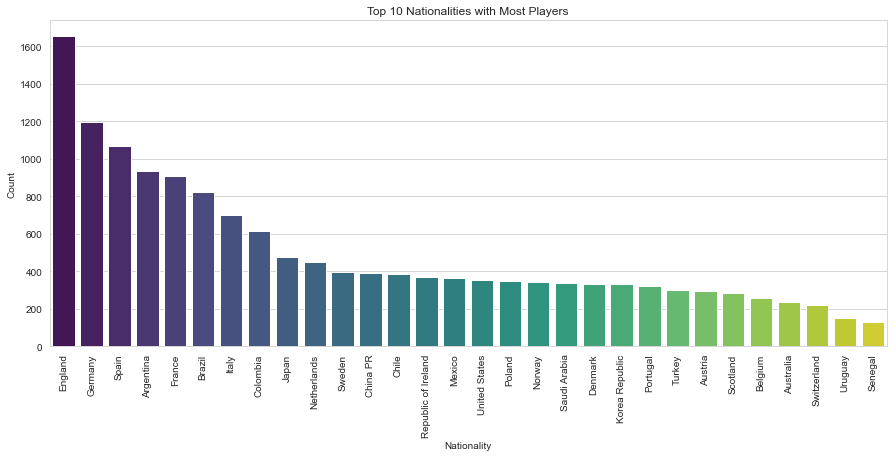

In [24]:
# Distribution of players Nationalities
# Assuming top_player_nationality is your DataFrame
top_twenty_nationalities = df["Nationality"].value_counts().nlargest(30)

plt.figure(figsize=(15, 6))
sns.countplot(x="Nationality", data=df, palette="viridis", order=top_twenty_nationalities.index)
plt.title("Top 10 Nationalities with Most Players")
plt.ylabel("Count")
plt.xlabel("Nationality")
plt.xticks(rotation=90)
plt.show()



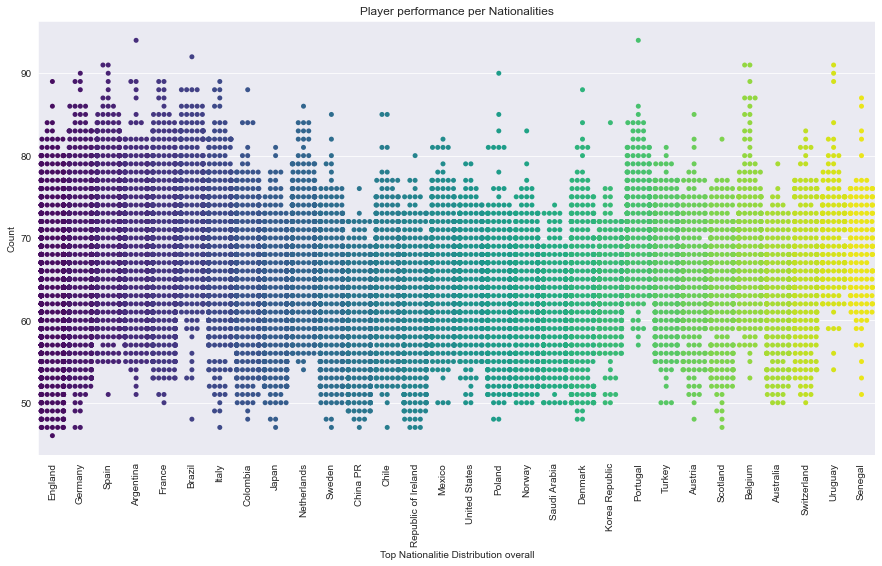

In [34]:
# correlation of nationalities and performance

plt.figure(figsize=(15,8))
sns.swarmplot(x="Nationality", y ="Overall", data=df, palette="viridis", order=top_twenty_nationalities.index)
sns.set_style("darkgrid")
plt.title("Player performance per Nationalities")
plt.ylabel("Count")
plt.xlabel("Top Nationalitie Distribution overall")
plt.xticks(rotation=90)
plt.show()

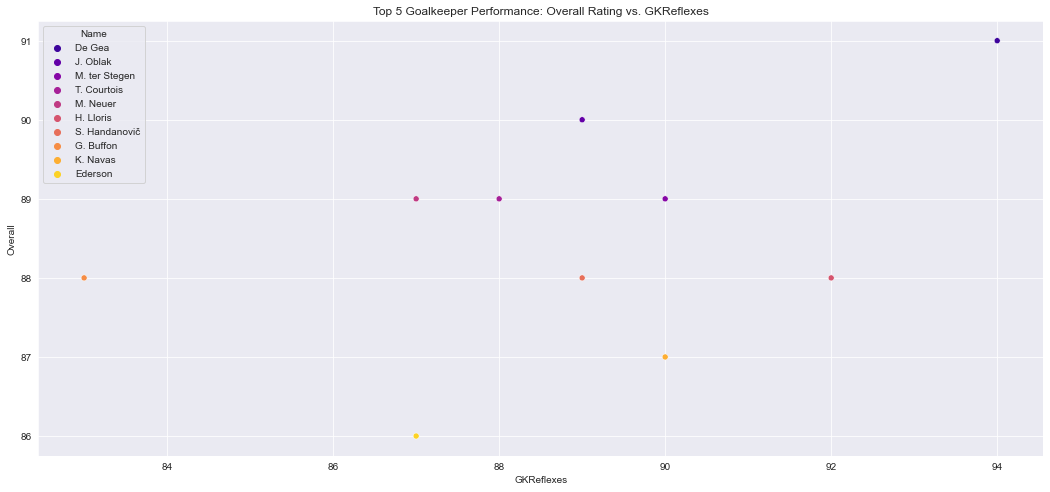

In [42]:
# Filter data for goalkeepers (GK)
goalkeepers = df[df['Position'] == 'GK']

# Identify the top 5 goalkeepers based on Overall Rating
top_goalkeepers = goalkeepers.nlargest(10, 'Overall')

# Scatter plot for Overall Rating vs. GKReflexes for the top 5 goalkeepers
plt.figure(figsize=(18, 8))
sns.scatterplot(x='GKReflexes', y='Overall', data=top_goalkeepers, hue='Name', palette='plasma')
plt.title('Top 5 Goalkeeper Performance: Overall Rating vs. GKReflexes')
plt.show()

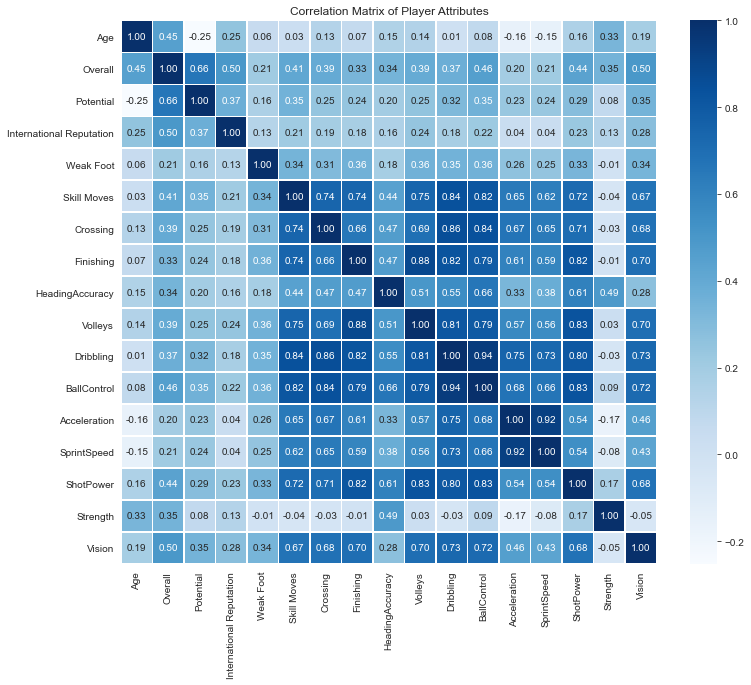

In [26]:
# Define the list of numerical columns
numerical_data = ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves',
                  'Crossing', 'Finishing', 'HeadingAccuracy', 'Volleys', 'Dribbling', 'BallControl',
                  'Acceleration', 'SprintSpeed', 'ShotPower', 'Strength', 'Vision']

# Selecting columns from the DataFrame
subset_data = df[numerical_data]

# Calculate correlation matrix
correlation_matrix = subset_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Player Attributes')
plt.show()

In [46]:
# Numerical Features
numerical_data = ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves',
                  'Crossing', 'Finishing', 'HeadingAccuracy', 'Volleys', 'Dribbling', 'BallControl',
                  'Acceleration', 'SprintSpeed', 'ShotPower', 'Strength', 'Vision']

In [28]:
#  Select relevant columns
selected_columns = numerical_data
selected_columns.append('Overall')  # Add the target variable

df_selected = df[selected_columns]


# Train-Test Split
X = df_selected.drop('Overall', axis=1)  # Features
y = df_selected['Overall']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

In [29]:
# instansiateing the LinearRegression
lin_reg = LinearRegression()

# fiting the trained data
lin_reg.fit( X_train_scaled, y_train)

# predicting the test data
y_pred = lin_reg.predict(X_test_scaled)


In [30]:
# Evaluating the model with mse and r2

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

5.918764401324451
0.8744336243749056


In [45]:
# Creating Model
rf = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=10, min_samples_leaf=2,min_samples_split=5, max_features="sqrt")

# Fit the model on the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = rf.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred = rf.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Training MSE: 2.1365395722755123
Test MSE: 2.984893873934349
Training R-squared: 0.9554678063280004
Test R-squared: 0.9366755829491011


## Bagging Regressor

In [32]:
# Example of using BaggingRegressor as an ensemble method
bagging_model = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=42)
bagging_model.fit(X_train_scaled, y_train)


BaggingRegressor(base_estimator=RandomForestRegressor(), random_state=42)

In [33]:
# Make predictions on the training set
y_train_pred_bagging = bagging_model.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred_bagging = bagging_model.predict(X_test_scaled)

# Evaluate the BaggingRegressor
train_mse_bagging = mean_squared_error(y_train, y_train_pred_bagging)
test_mse_bagging = mean_squared_error(y_test, y_test_pred_bagging)

train_r2_bagging = r2_score(y_train, y_train_pred_bagging)
test_r2_bagging = r2_score(y_test, y_test_pred_bagging)

print(f'BaggingRegressor Training MSE: {train_mse_bagging}')
print(f'BaggingRegressor Test MSE: {test_mse_bagging}')

print(f'BaggingRegressor Training R-squared: {train_r2_bagging}')
print(f'BaggingRegressor Test R-squared: {test_r2_bagging}')

BaggingRegressor Training MSE: 0.6048706828663933
BaggingRegressor Test MSE: 1.6592428237885513
BaggingRegressor Training R-squared: 0.9873925956039127
BaggingRegressor Test R-squared: 0.964799222685996
